In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stats = './result/100/stats/stats1.txt'
df = pd.read_csv(stats)


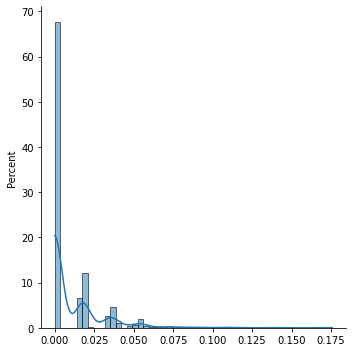

In [29]:
df.describe()
errors = (1.0 - df['#intx_cand_mst_best'] / df['n#intx_cand_mst']) * 100.0
#errors.hist(bins = 100)
#df.head()
sns.displot(errors, kind='hist', stat='percent', kde=True)
#df.apply(lambda row: row['#intx_cand_mst_best'] / row['n#intx_cand_mst'])